# Estudo prático da estrutura das redes neurais recorrentes

#### Sabrina Otoni da Silva - 2023

In [17]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [4]:
previsores = []
preco_real = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
    
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [5]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 8s 99ms/step - loss: 0.0356 - mean_absolute_error: 0.1361
Epoch 2/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0162 - mean_absolute_error: 0.0986
Epoch 3/100
36/36 [==============================] - 4s 99ms/step - loss: 0.0139 - mean_absolute_error: 0.0913
Epoch 4/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0127 - mean_absolute_error: 0.0870
Epoch 5/100
36/36 [==============================] - 4s 103ms/step - loss: 0.0089 - mean_absolute_error: 0.0736
Epoch 6/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0102 - mean_absolute_error: 0.0782
Epoch 7/100
36/36 [==============================] - 4s 98ms/step - loss: 0.0098 - mean_absolute_error: 0.0753
Epoch 8/100
36/36 [==============================] - 4s 98ms/step - loss: 0.0074 - mean_absolute_error: 0.0660
Epoch 9/100
36/36 [==============================] - 4s 111ms/step - loss: 0.0086 - mean_absolute_error: 0.0

In [7]:
base_teste = pd.read_csv('petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values

base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])

X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

previsoes.mean()
preco_real_teste.mean()

1/1 [==============================] - 1s 1s/step


17.87454563636364

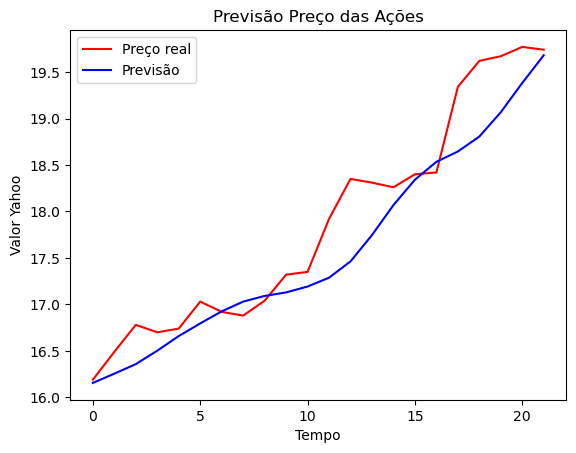

In [8]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsão')
plt.title('Previsão Preço das Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()

In [9]:
base_valor_maximo = base.iloc[:, 2:3].values
normalizador = MinMaxScaler(feature_range=(0,1))
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

In [10]:
previsores = []
preco_real1 = []
preco_real2 = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real1.append(base_treinamento_normalizada[i, 0])
    preco_real2.append(base_valor_maximo_normalizada[i, 0])

previsores, preco_real1, preco_real2 = np.array(previsores), np.array(preco_real1), np.array(preco_real2)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

preco_real = np.column_stack((preco_real1, preco_real2))

In [11]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 2, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 7s 87ms/step - loss: 0.0374 - mean_absolute_error: 0.1413
Epoch 2/100
36/36 [==============================] - 4s 100ms/step - loss: 0.0170 - mean_absolute_error: 0.1014
Epoch 3/100
36/36 [==============================] - 3s 88ms/step - loss: 0.0142 - mean_absolute_error: 0.0913
Epoch 4/100
36/36 [==============================] - 3s 89ms/step - loss: 0.0126 - mean_absolute_error: 0.0880
Epoch 5/100
36/36 [==============================] - 3s 86ms/step - loss: 0.0106 - mean_absolute_error: 0.0802
Epoch 6/100
36/36 [==============================] - 3s 84ms/step - loss: 0.0116 - mean_absolute_error: 0.0828
Epoch 7/100
36/36 [==============================] - 3s 88ms/step - loss: 0.0091 - mean_absolute_error: 0.0726
Epoch 8/100
36/36 [==============================] - 3s 87ms/step - loss: 0.0096 - mean_absolute_error: 0.0750
Epoch 9/100
36/36 [==============================] - 3s 92ms/step - loss: 0.0092 - mean_absolute_error: 0.0713


In [12]:
preco_real_teste = base_teste.iloc[:, 1:2].values

preco_real_open = base_teste.iloc[:, 1:2].values
preco_real_high = base_teste.iloc[:, 2:3].values

base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

1/1 [==============================] - 3s 3s/step


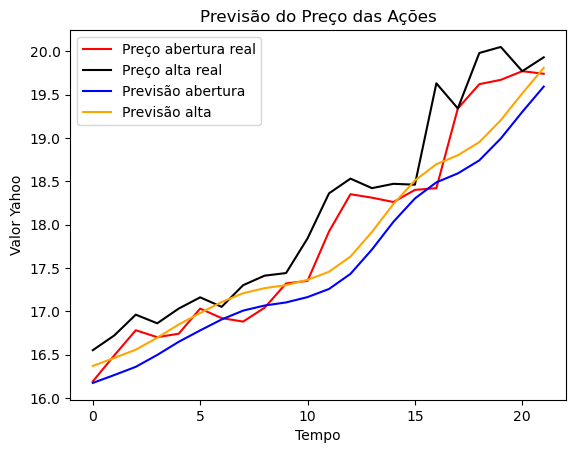

In [13]:
plt.plot(preco_real_open, color = 'red', label = 'Preço abertura real')
plt.plot(preco_real_high, color = 'black', label = 'Preço alta real')

plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsão abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsão alta')

plt.title('Previsão do Preço das Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()

In [26]:
base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:7].values

normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento[:,0:1])

previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0:6])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [27]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'sigmoid'))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])

In [28]:
es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)

In [29]:
rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, verbose = 1)

In [30]:
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', 
                      save_best_only = True, verbose = 1)

In [31]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32,
              callbacks = [es, rlr, mcp])

Epoch 1/100


36/36 [==============================] - ETA: 0s - loss: 0.0173 - mean_absolute_error: 0.0987
Epoch 1: loss improved from inf to 0.01735, saving model to pesos.h5
36/36 [==============================] - 19s 187ms/step - loss: 0.0173 - mean_absolute_error: 0.0987 - lr: 0.0010
Epoch 2/100


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 [==============================] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0559
Epoch 2: loss improved from 0.01735 to 0.00516, saving model to pesos.h5
36/36 [==============================] - 7s 180ms/step - loss: 0.0052 - mean_absolute_error: 0.0559 - lr: 0.0010
Epoch 3/100
36/36 [==============================] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0517
Epoch 3: loss improved from 0.00516 to 0.00430, saving model to pesos.h5
36/36 [==============================] - 7s 184ms/step - loss: 0.0043 - mean_absolute_error: 0.0517 - lr: 0.0010
Epoch 4/100
36/36 [==============================] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0511
Epoch 4: loss did not improve from 0.00430
36/36 [==============================] - 6s 172ms/step - loss: 0.0043 - mean_absolute_error: 0.0511 - lr: 0.0010
Epoch 5/100
36/36 [==============================] - ETA: 0s - loss: 0.0038 - mean_absolute_error: 0.0471
Epoch 5: loss improved from 0.00430 to 0.00378, saving model

In [32]:
frames = [base, base_teste]
base_completa = pd.concat(frames)
base_completa = base_completa.drop('Date', axis = 1)

entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0:6])
X_teste = np.array(X_teste)

previsoes = regressor.predict(X_teste)
previsoes = normalizador_previsao.inverse_transform(previsoes)

previsoes.mean()
preco_real_teste.mean()

1/1 [==============================] - 5s 5s/step


17.87454563636364

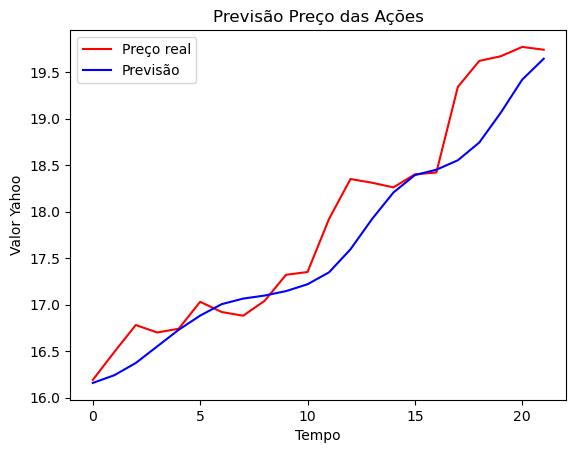

In [33]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsão')
plt.title('Previsão Preço das Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()

In [34]:
base = pd.read_csv('petr4_treinamento_ex.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

previsores = []
preco_real = []
for i in range(90, 1342):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [35]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', 
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 [==============================] - 23s 182ms/step - loss: 0.0251 - mean_absolute_error: 0.1180
Epoch 2/100
40/40 [==============================] - 9s 214ms/step - loss: 0.0118 - mean_absolute_error: 0.0827
Epoch 3/100
40/40 [==============================] - 9s 214ms/step - loss: 0.0096 - mean_absolute_error: 0.0765
Epoch 4/100
40/40 [==============================] - 8s 204ms/step - loss: 0.0088 - mean_absolute_error: 0.0708
Epoch 5/100
40/40 [==============================] - 9s 220ms/step - loss: 0.0081 - mean_absolute_error: 0.0682
Epoch 6/100
40/40 [==============================] - 9s 216ms/step - loss: 0.0070 - mean_absolute_error: 0.0646
Epoch 7/100
40/40 [==============================] - 8s 207ms/step - loss: 0.0071 - mean_absolute_error: 0.0644
Epoch 8/100
40/40 [==============================] - 8s 204ms/step - loss: 0.0060 - mean_absolute_error: 0.0583
Epoch 9/100
40/40 [==============================] - 8s 206ms/step - loss: 0.0065 - mean_absolute_error

In [36]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 109):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

previsoes.mean()
preco_real_teste.mean()

1/1 [==============================] - 3s 3s/step


17.87454563636364

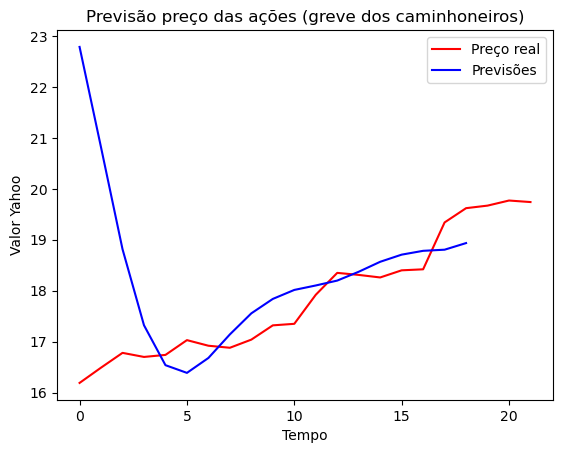

In [37]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações (greve dos caminhoneiros)')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()